# Police Shootings, Poverty, and HS Graduations

### Capstone Project by: Michael Kessler

The topic of racially motivated police shootings in the US is current and contentious. Media coverage is notably biased toward narratives that support one of two conclusions. The fist is the position that race is a significant contributor to the number of police shooting incidents, with particular focus on blacks. The other narrative supported is that the racial effect is insignificant and that any rise in police shootings of black Americans is a result of crime rates in black neighborhoods. And of course there are variations along a spectrum between these positions. 

Clearly, either of these positions must be propped up on mountains of good data with clear, calculable hypotheses. It is vital to the national dialogue that conversations about the data be as dispassionate as possible and that the conclusions not be led by bias or presupposition. 
    
The dataset located on www.kaggle.com entitled ‘Fatal Police Shootings in the US’ contains five CSV files for 2015 information on US median household income, percentage of high school graduations, percentage of people living below the poverty level, police killings, and racial breakdowns of US cities, all within 2015. The statewide data is further broken down by city. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
income = pd.read_csv('MedianHouseholdIncome2015.csv', encoding='latin1')
poverty = pd.read_csv('PercentagePeopleBelowPovertyLevel.csv', encoding='latin1')
highSchool = pd.read_csv('PercentOver25CompletedHighSchool.csv', encoding='latin1')
killings = pd.read_csv('PoliceKillingsUS.csv', encoding='latin1')
race = pd.read_csv('ShareRaceByCity.csv', encoding='latin1')

In order to manage the data, I grouped all city data under their respective states, taking the means of the city data as the representative of the state with city data that is incomplete being dropped to prevent erroneous skewing. City data that lacks any value for income, poverty percentage, or high school grad rates are omitted for all three as well

In [3]:
income['Median Income'] = pd.to_numeric(income['Median Income'], errors='coerce').dropna().astype(np.int64)
income_state = income.groupby(['Geographic Area'])[['Median Income']].mean()
poverty['poverty_rate'] = pd.to_numeric(poverty['poverty_rate'], errors='coerce').fillna(0).astype(np.int64)
poverty_state = poverty.groupby(['Geographic Area'])[['poverty_rate']].mean()
highSchool['percent_completed_hs'] = pd.to_numeric(highSchool['percent_completed_hs'], errors='coerce').fillna(0).astype(np.int64)
highSchool_state = highSchool.groupby(['Geographic Area'])[['percent_completed_hs']].mean()

In [4]:
income_state.describe()

,Median Income
count,51.000000
mean,51937.305444
std,11288.986864
min,35002.099125
25%,42899.002128
50%,49811.306215
75%,59765.825500
max,80584.406367


In [5]:
poverty_state.describe()

,poverty_rate
count,51.000000
mean,15.712898
std,4.531245
min,7.708257
25%,12.220913
50%,15.063235
75%,19.356714
max,26.425414


In [6]:
highSchool_state.describe()

,percent_completed_hs
count,51.000000
mean,85.432820
std,4.501989
min,73.669147
25%,81.761420
50%,87.196286
75%,89.080398
max,91.585366


The income information for Arizona, for example, is calculated using the median household income for its 372 cities, resulting in a mean income of $42,495.67:

In [7]:
income.loc[income['Geographic Area'] == 'AZ'].describe()

,Median Income
count,372.000000
mean,42495.666667
std,19503.296251
min,4511.000000
25%,30055.500000
50%,39000.000000
75%,49930.000000
max,151184.000000


Note the use of Median Income for the cities as the measure of central tendency. Though the mean is often a better measure, this eliminates skewing due to outliers. However, the central tendency of the states is measured using mean of the medians. The distribution of these incomes for Arizona follows the same right-skewed distribution as that of the national data:

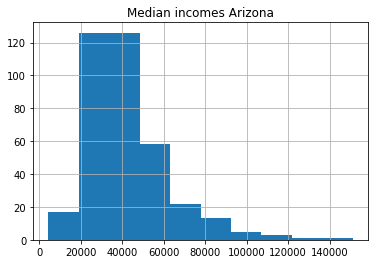

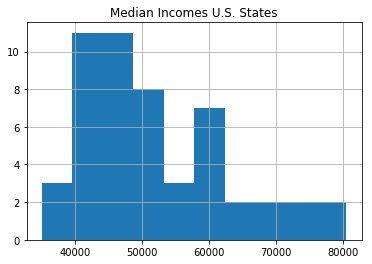

In [8]:
income_az = income.loc[income['Geographic Area'] == 'AZ']
pd.DataFrame.hist(income_az, bins=10)
plt.title('Median incomes Arizona')
pd.DataFrame.hist(income_state, bins=10)
plt.title('Median Incomes U.S. States')

The first problem with the data I found is that no matter how complete the data is for each locale and what statistical correlations may exist, this is only data for a single year, 2015. Without previous year data to compare, any correlations cannot be shown to reflect any trends. Accordingly, I decided to move my focus away from the data on police shootings until I had processed and analyzed the raw demographic data as it pertains to education, income, and poverty. To start, I wanted to see if there appears to be a correlation between high school graduation rates, income, and poverty. It seems intuitive that they are related. But again, given the politically charged nature of the subject verification of what is presumed true seems appropriate.  
    
Additionally, one might wonder why, if statistical relationships between race and police shootings are the focus, why all the demographic data on wealth and education to begin with. The answer rests in the alternate opinion that high crime rates in certain areas are the cause of increased police shootings and that these areas can be identified by low graduation rates and income as well as high percentages of the population living below the poverty line. So it is this relationship that I’ll investigate first. 
    
To calculate the strength of a linear relationship between two variables, we use the sample correlation coefficient, or a Pearson’s r. Its range is -1 ≤ r ≤ +1. The closer r is to 0 the less of a linear relationship exists between x and y. Near +1 we can say that there is a strong positive relationship, while a value closer to -1 indicates a strong negative relationship. Using the mean poverty rates, graduation rates, and mean of median incomes for each state, plus Washington D.C. we have 51 data points to work with. Statisticians often determine this by calculating the coefficient for high school graduation rates and poverty. 

In [9]:
income_highSchool_state = pd.concat([income_state['Median Income'], highSchool_state['percent_completed_hs']], axis=1, keys=['income_state', 'highSchoolState'])
income_highSchool_state.corr(method='pearson')

,income_state,highSchoolState
income_state,1.000000,0.562528
highSchoolState,0.562528,1.000000


Accordingly, we see that income and high school graduation rates have an above average positive relationship of 0.562528. Of course, another quick way to assess the relationship of these variables is a simple scatter plot analysis. 

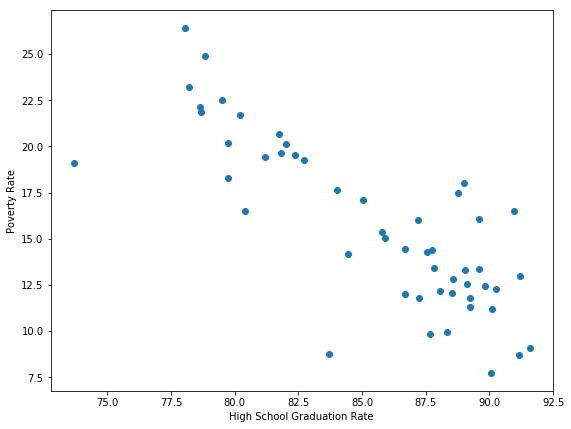

In [10]:
fig = plt.figure(figsize=(9,7))
plt.scatter(highSchool_state, poverty_state, s=None)
plt.xlabel("High School Graduation Rate")
plt.ylabel("Poverty Rate")

Here we can see a clearly strong, negative linear relationship between the two variables, this time using high school graduation rates and percentage of population below the poverty level. This means that as high school graduation rates increase, poverty decreases. An unsurprising result, as is the strong positive linear relationship between high school graduation and income, albeit somewhat weaker than the former relationship as might be expected in a capitalist job market. 

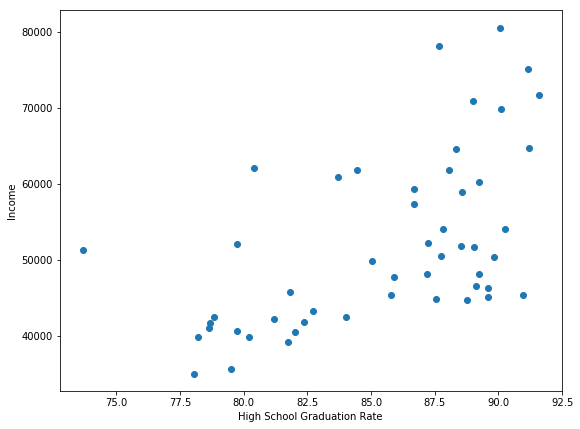

In [12]:
fig = plt.figure(figsize=(9,7))
plt.scatter(highSchool_state, income_state, s=None)
plt.xlabel("High School Graduation Rate")
plt.ylabel("Income")

The next question to be asked is whether or not the racial makeup of areas most affected by low education, low income, and higher poverty levels are consistent with the media narrative. If true, however, the next step is not to start analyzing police shootings in these areas until we can establish that these regions also possess higher crime rates that would call for increased police presence. If an area is being policed more, then increases in police activity is to be expected and the per-capita rates of police shootings may be entirely consistent. This will be the focus of further research. 